In [1]:
import numpy as np
from scipy.optimize import curve_fit
import csv
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams.update({'font.size': 24})

In [9]:
def utility(x, lambda1, lambda2):
    return lambda1 * (x-10) * (x>=10) + lambda2 * (x-10) * (x<10)
    
    
def value_gamble(x_plus, lambda1, lambda2):
    return 0.5 * utility(x_plus, lambda1, lambda2) + 0.5 * utility(0, lambda1, lambda2)


def gamble_probability(x_plus, lambda1, lambda2):
    return 1 / (1 + np.exp(-value_gamble(x_plus, lambda1, lambda2)))

In [16]:
#open the given file in read mode
f = open("/Users/sherryyueyijiang/Documents/Research Project/Social Influence Study/modeling/ProspectTheory/data/money_gain_risk_seeking.csv", "r")
# print(type(f)) #print the type of the stream f

csvreader = csv.reader(f, delimiter=',')
outcome = []
gamble_value = []
phase = []
for i, row in enumerate(csvreader):
    if i != 0:
#         print(row)
        outcome.append(int(row[1]))
        gamble_value.append(int(row[2]))
        phase.append('Base' in row[6])

In [17]:
outcome = np.array(outcome)
gamble_value = np.array(gamble_value)
phase = np.array(phase)

In [18]:
popt, pconv = curve_fit(gamble_probability, gamble_value[phase], outcome[phase])
lambda1_base = popt[0]
lambda2_base = popt[1]
loss_base = np.sqrt(np.diag(pconv))

popt, pconv = curve_fit(gamble_probability, gamble_value[~phase], outcome[~phase])
lambda1_transfer = popt[0]
lambda2_transfer = popt[1]
loss_transfer = np.sqrt(np.diag(pconv))


In [21]:
# print(lambda1)
# print(lambda2)
# print(loss)

Text(0, 0.5, 'Utility')

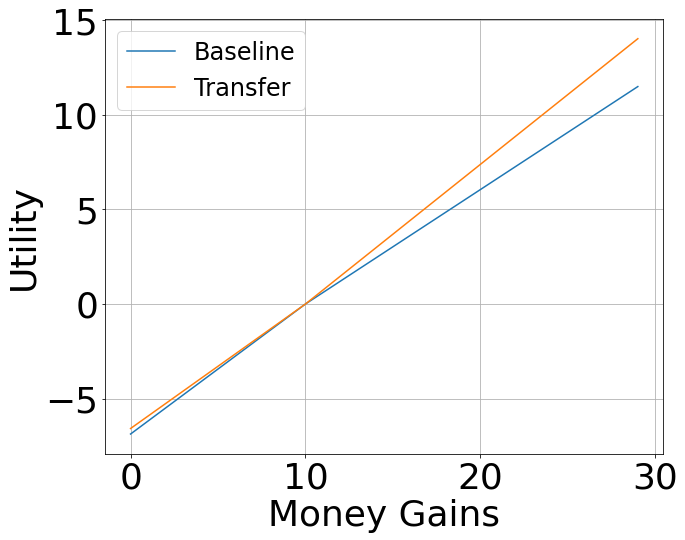

In [20]:
x = np.arange(0, 30)
plt.rcParams.update({'font.size': 36})

plt.plot(x, utility(x, lambda1_base, lambda2_base), label='Baseline')
plt.plot(x, utility(x, lambda1_transfer, lambda2_transfer), label='Transfer')
plt.legend(fontsize=24)
plt.grid()
plt.xlabel('Money Gains')
plt.ylabel('Utility')

In [22]:
unique_gamble_values = np.unique(gamble_value)
print(unique_gamble_values)
data_prob = np.zeros(unique_gamble_values.shape)
for i, v in enumerate(unique_gamble_values):
    mask = gamble_value[phase] == v
    data_prob[i] = np.mean(outcome[phase][mask])

[10 12 14 16 18 20 22 24 26 28 30]


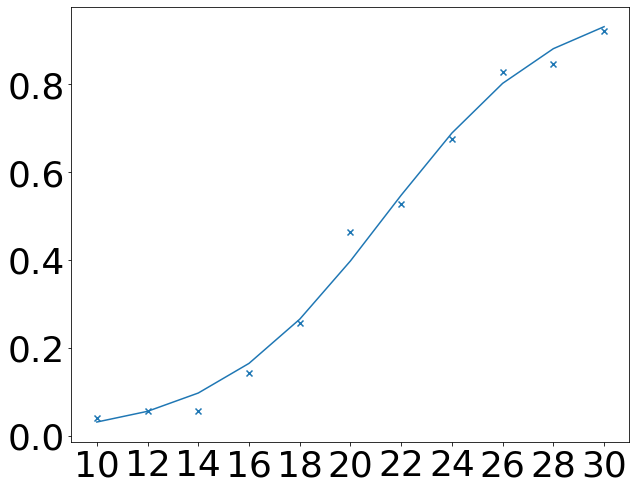

In [23]:
plt.scatter(unique_gamble_values, data_prob, label='data', marker='x')
plt.plot(unique_gamble_values, gamble_probability(unique_gamble_values, lambda1_base, lambda2_base), label='fit')
plt.xticks(unique_gamble_values);

In [24]:
unique_gamble_values = np.unique(gamble_value)
print(unique_gamble_values)
data_prob = np.zeros(unique_gamble_values.shape)
for i, v in enumerate(unique_gamble_values):
    mask = gamble_value[~phase] == v
    data_prob[i] = np.mean(outcome[~phase][mask])

[10 12 14 16 18 20 22 24 26 28 30]


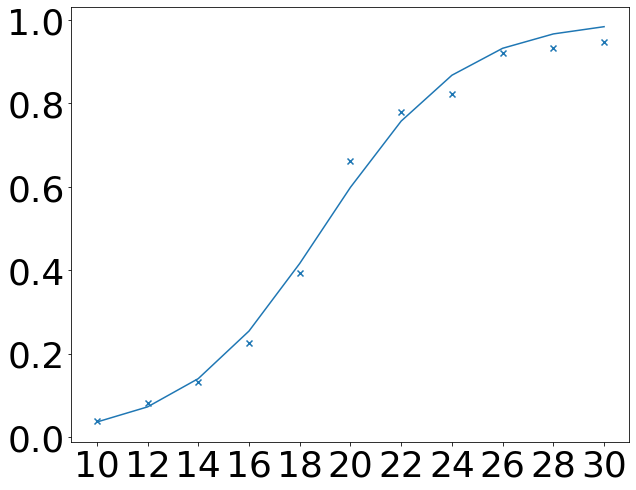

In [25]:
plt.scatter(unique_gamble_values, data_prob, label='data', marker='x')
plt.plot(unique_gamble_values, gamble_probability(unique_gamble_values, lambda1_transfer, lambda2_transfer), label='fit')
plt.xticks(unique_gamble_values);

In [26]:
print(lambda2_base / lambda1_base)
print(lambda2_transfer / lambda1_transfer)

1.1365417703707514
0.8918973633160625
